# Moran model 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
def flip(n, k, s, u):
    """Flip a three sided coin to determine movement"""
    # Probabilities of moving up or down
    p_down = (n-k)*k/(n*((1+s)*k + n - k))
    p_up = (1+s)*k*(n-k)/(n*((1+s)*k + n - k))
    #
    if u < p_down: # p_down
        return -1
    elif u < p_down + p_up: # p_up
        return 1
    else:
        return 0
        
def moran(n, k0, t, s):
    # Create vector to store population counts
    pop = np.empty(t)
    pop[0] = k0
    # Sample random uniform variable
    flips = np.random.rand(t,)
    #
    for i in range(1,t):
        pop[i] = pop[i-1] + flip(n, pop[i-1], s, flips[i,])
        
    return pop


In [8]:
# Population size
N = 100
# Number of individuals replaced
t = 10000

## Drift that looks like selection

In [4]:
drift = []
for i in range(100000):
    np.random.seed(i)
    test = moran(N, 10, 10000, 0)
    if test[-1] > .95*N and test[t/2] < .5*N and test[t/4] < test[t/2] and test[3*t/4] > test[t/2]:
        drift.append(i)

In [44]:
interesting_drift = [8190, 13610, 13034, 20241, 30009, 30071, 40691, 44753, 46069, 46526, 46529,\
                    46695, 46843, 46888, 49371, 49852, 56414, 61232, 61595, 62961, 64616, 64844,\
                     65491, 68332, 71765, 80327, 81877, 83354, 83388, 88942, 92106, 94190, 95997,\
                    97710, 99917]

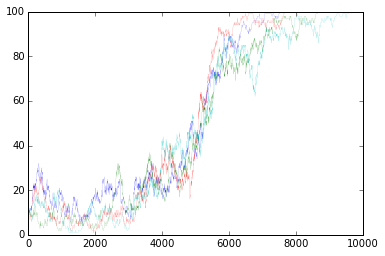

In [49]:
for i in [64844, 81877, 94190, 99917]:
    np.random.seed(i)
    test = moran(N, 10, t, 0)
    plt.plot(test, linewidth=.1)
    plt.ylim(0,100)
plt.show()

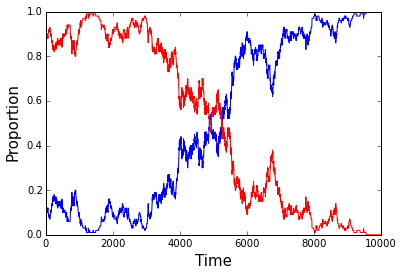

In [63]:
np.random.seed(99917)
test = moran(N, 10, t, 0)/float(N)
plt.plot(test, 'b')
plt.plot(1 - test, 'r')
plt.xlabel('Time', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.savefig("drift-selection.png", format='png', dpi=600)
plt.ylim(0,1)
plt.show()

## Selection that looks like drift

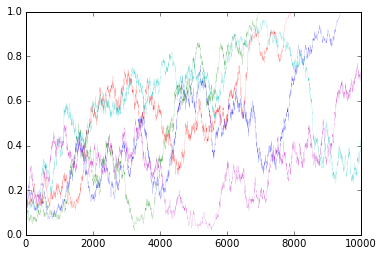

In [93]:
for i in [9, 10,  28, 57, 89]:
    np.random.seed(i)
    test = moran(N, 10, t, .1)/float(N)
    plt.plot(test, linewidth=.1)
plt.ylim(0,1)
plt.show()

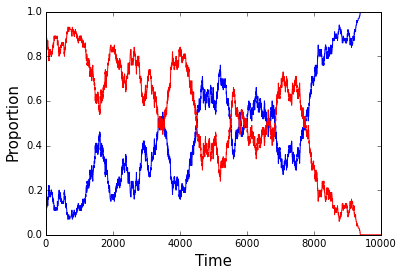

In [97]:
np.random.seed(9)
test = moran(N, 10, t, .1)/float(N)
plt.plot(test, 'b')
plt.plot(1 - test, 'r')
plt.ylim(0,1)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.savefig("selection-drift.png", format='png', dpi=600)
plt.show()

# Wright-Fisher model 

In [75]:
def wright_fisher(n, k0, t, s):
    population = np.empty(t)
    population[0] = k0
    for i in range(1,t):
        k = population[i-1]
        prob = k*(1+s)/(k*(1+s) + (n-k))
        population[i] = np.random.binomial(n, prob)
    return population

In [30]:
drift = []

for i in range(100000):
    np.random.seed(i)
    test = wright_fisher(N, 10, 50, 0)
    if test[-1] > .95*N and test[24] < .5*N and test[12] < test[24] and test[36] > test[24]:
        drift.append(i)

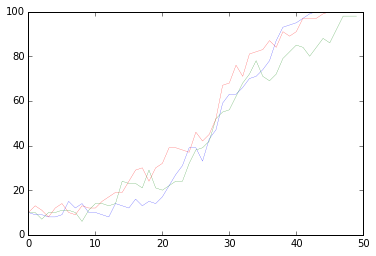

In [83]:
for i in [14881, 37182, 86336]:
    np.random.seed(i)
    test = wright_fisher(100, 10, 50, 0)
    plt.plot(test, linewidth=.2)
    plt.ylim(0,100)
plt.show()

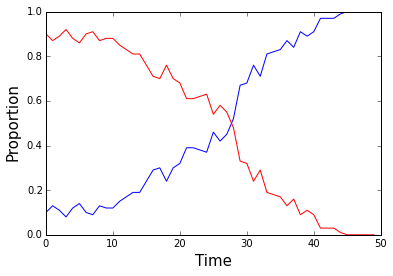

In [34]:
np.random.seed(86336)
test = wright_fisher(100, 10, 50, 0)/float(100)
plt.plot(test, 'b-')
plt.plot(1-test, 'r-')
plt.ylim(0,1)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.savefig("wright-fisher-drift-selection.png", format='png', dpi=600)
plt.show()

In [6]:
selection = []

for i in range(100000):
    np.random.seed(i)
    test = wright_fisher(100, 10, 50, 0.1)
    if test[-1] < 50 and test[-1] > test[0] and test[24] > 50 and test[13] < test[24] and test[37] < test[24]:
        selection.append(i)

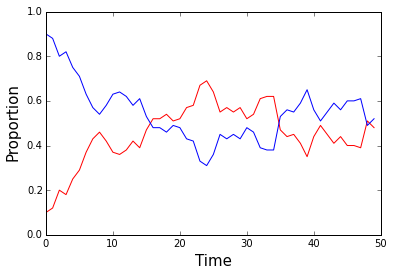

In [38]:
np.random.seed(31888)
test = wright_fisher(100, 10, 50, 0.1)/float(100)
plt.plot(test, 'r-')
plt.plot(1-test, 'b-')
plt.ylim(0,1)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.savefig("wright-fisher-selection-drift.png", format='png', dpi=600)
plt.show()

In [9]:
embracing = [52/float(80), 58/float(174), 252/float(413), 51/float(290), 14/float(99)]
postverbal = [1 - item for item in embracing]

In [35]:
def rescale(freq):
    Y = np.zeros(len(freq)-1)
    for i in range(len(freq)-1):
        Y[i] = (freq[i+1] - freq[i])/np.sqrt(2*freq[i]*(1-freq[i])*50)
    return Y

In [41]:
rescale(postverbal)

array([ 0.06639137, -0.05872582,  0.08905004,  0.00904851])

In [37]:
from scipy.stats import ttest_1samp

In [39]:
ttest_1samp(rescale(postverbal), 0)

Ttest_1sampResult(statistic=0.80112643659279636, pvalue=0.48163676461901322)

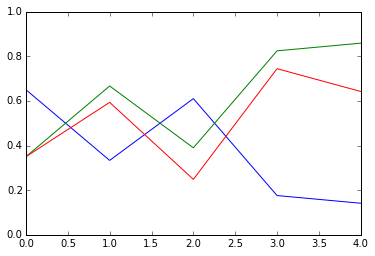

In [16]:
plt.plot(embracing)
plt.plot(postverbal)
plt.plot(rescale(postverbal))
plt.ylim(0,1)
plt.show()